<br>
<h1 style="font-family:sans-serif; text-align:center"> 
<!--     <span style='color: pink'> Twitter analysis of </span> -->
    <span style='color: white; font-size:50%; text-shadow: 0px 0px 15px black'> Twitter analysis of </span>
<!--     <span style='color:#00acee'> Twitter analysis of </span> -->
<!--     <span style="-webkit-text-stroke"> Twitter analysis of</span> -->
<!--     <span class="hr3" style='color:#e40843; letter-spacing: 4px; font-size:105%'> Canada</span> -->
    <span class="hr3" style='color:#e40843; font-size:60%; text-shadow: 0px 0px 30px pink'>Canada </span> <span class="hr3" style='color:gray; font-size:50%; text-shadow: 0px 0px 30px pink'>response to Covid-19</span><br>
</h1>

# Sentiment Analysis

The aim of this notebook is to analyze the retrieved tweets obtained using *snscrape*, from March 1st to April 30th of 2020, from Government of Canada official Twitter accounts.

_Authors: Leo Cuspinera ([cuspime](https://github.com/cuspime)) and Victor Cuspinera ([vcuspinera](https://github.com/vcuspinera))_

## Import libraries

In [184]:
# General libraries
import pandas as pd
import numpy as np
import os
import time
from datetime import datetime, timedelta, date
# from pytz import timezone
# import json

# To plot
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import altair as alt
alt.renderers.enable('mimetype')

# Preprocess libraries
import re
import spacy
import string
import en_core_web_sm
nlp = en_core_web_sm.load()

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# WordCloud:
from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# For Sentiment analysis
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Necessary to plot timeseries:
pd.plotting.register_matplotlib_converters()

## Open `json` file with all tweets

In [185]:
%%time

# Parameters
my_folder = "../tweets/"

# Open `json` files of tweets with SpaCy sentiment
df = pd.DataFrame()
for i in range(0,10):
    df_sub = pd.read_json(my_folder + 'tweets_sentiment_' + str(i) + '.json')
    df = pd.concat([df, df_sub])

df.reset_index(drop=True, inplace=True)

CPU times: user 50.2 s, sys: 6.99 s, total: 57.2 s
Wall time: 59.3 s


In [186]:
# show the data frame
df.tail(3)

,account,date,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,username,followersCount,friendsCount,location,tweet,day,announcement,polarity,subjectivity
2915142,JustinTrudeau,2020-04-30 00:00:27,1,0,2,0,en,Twitter for iPhone,SRodrigues52,219,412,"London, On",@shelbzzzzy @justintrudeau quit your job 🧐,2020-04-30,True,0.000000,0.000000
2915143,JustinTrudeau,2020-04-30 00:00:19,1,0,0,0,en,Twitter for iPhone,pffoote,356,1531,"St. John's, NL, Canada",@rcaf_arc @cfsnowbirds @canadianforces @cfoper...,2020-04-30,True,0.392857,0.517857
2915144,JustinTrudeau,2020-04-30 00:00:08,0,0,0,0,en,Twitter Web App,DavidCBarron,231,331,Brampton Ontario,@cbcnews @ctvnews @justintrudeau @celliottabil...,2020-04-30,True,-1.000000,1.000000


## Analysis of all tweets
In this section we work with wordcloud and sentiment analysis of all tweets.

### Wordcloud

In [187]:
stopwords = set(STOPWORDS)
stopwords.update(['lo','u',"I'm","We'll", 'Nous', 'di', 'Herr', 'ist','de','die',
                  'a','por','https','I', 'noch', 'much', 'uns', 'many', 'day', 'come',
                  'los', 'eine', 'wie', 'aut', 'les', 'sind','un', 'et','il','le','las',
                  'la', 'nos','will', 'dan', 'se', 'au', 'una', 'unas','le','aut','and',
                  'den', 'ein', 'al', 'des','_','il', 'e', 'en', 'que',
                  'non', 'da', 'Ich', 'la', 'mit', 'zu', 'es', 'con', 'von', 'und', 'auf', 
                  'auch','sich', 'der', 'hasta', 'das', 'Sie', 'para', 'el', 'per'])

def CleanText(txt):
    txt = re.sub(r'https?:\/\/.*[\r\n]*','',txt) # Remove hyperlinks
    # Remove some nonsense
    txt = re.sub(r'dans le','',txt)
    txt = re.sub(r'Sie uns','',txt)
    txt = re.sub(r'RT[\s]+','',txt) # remove retweets
    txt = re.sub(r'\d+','',txt) #remove digits
    txt = re.sub(' '+' | '.join(stopwords).lstrip(' | ')+' ',' ',txt ) 
    # 🔥 This is the right way to remove stopwords
    
    return txt

In [188]:
# data and mask
allwords = ' '.join(df.tweet.values.tolist())
mask = np.array(Image.open('../img/Canadian_Flag.jpg'))

In [189]:
# get wordcloud
wcloud = WordCloud(width=3000, height=1700, random_state=11, max_font_size=211, background_color='white',
                max_words=400, collocations=False, mode='RGBA',mask=mask, #stopwords=stopwords#,
                  #font_path='C://WINDOWS//FONTS//LATOWEB-LIGHT.TTF'
                  ).generate(allwords)


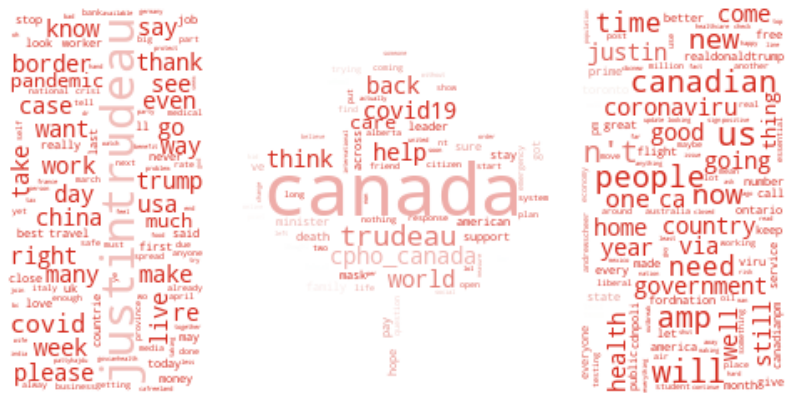

In [190]:
# plot
plt.figure(figsize=(14,8))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.imshow(wcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("../img/canada_word_cloud.jpg", format="jpg")

> In the wordcloud we find that the most used word in the tweets is `canada`, followed by `justintrudeau`. There are other words highly used in tweets as `us`,`time`, `canadian`, `people`, `will`, `coronavirus`, ` covid`, `right`, `china`, among others.

### Repetition of words

In [191]:
df_weights = pd.DataFrame.from_dict(wcloud.words_, orient='index') \
               .reset_index().rename(columns={'index':'word', 0:'weight'})

In [192]:
pd.DataFrame(wcloud.layout_)[1]
df_weights.head()

,word,weight
0,canada,1.000000
1,justintrudeau,0.279725
2,us,0.122011
3,will,0.114868
4,n't,0.101240


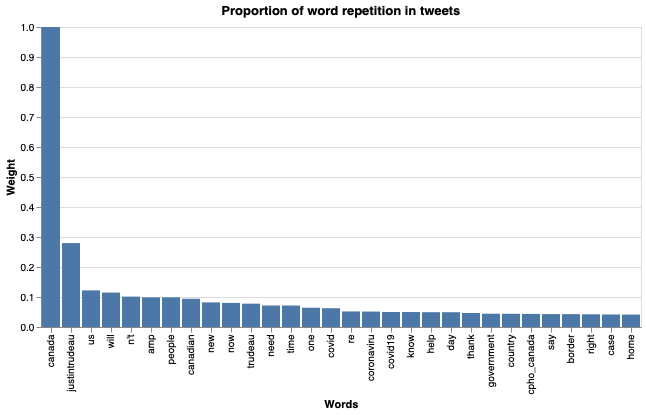

In [193]:
# plot
alt.Chart(df_weights[:30]).mark_bar().encode(
    x=alt.X('word', sort=df_weights.word.to_list(), title="Words"),
    y=alt.Y('weight', title="Weight")
).properties(
    title="Proportion of word repetition in tweets"
)

> In the previous plot we identify the words with higher proportion of repetitions, considering `canada` as the word more repeated in tweets. These more repeated words coincide with the biggest words in the previous word cloud.

## Analysis comparing tweets before and after Trudeau's announcement
In this section we work with wordcloud and sentiment analysis comparing results of tweets published before Trudeau's announcement, with tweets published after the announcement.

### Wordclouds

In [194]:
allwords_before = ' '.join(df[df.announcement == False].tweet.values.tolist())
allwords_after = ' '.join(df[df.announcement == True].tweet.values.tolist())

In [195]:
wcloud_before = WordCloud(width=3000, height=1700, random_state=11, max_font_size=211, background_color='white',
                max_words=400, collocations=False, mode='RGBA',# mask=mask, #stopwords=stopwords#,
                  #font_path='C://WINDOWS//FONTS//LATOWEB-LIGHT.TTF'
                  ).generate(allwords_before)
wcloud_after = WordCloud(width=3000, height=1700, random_state=11, max_font_size=211, background_color='white',
                max_words=400, collocations=False, mode='RGBA',# mask=mask, #stopwords=stopwords#,
                  #font_path='C://WINDOWS//FONTS//LATOWEB-LIGHT.TTF'
                  ).generate(allwords_after)

Text(0.5, 1.0, "Wordcloud of tweets before Trudeau's announcement")

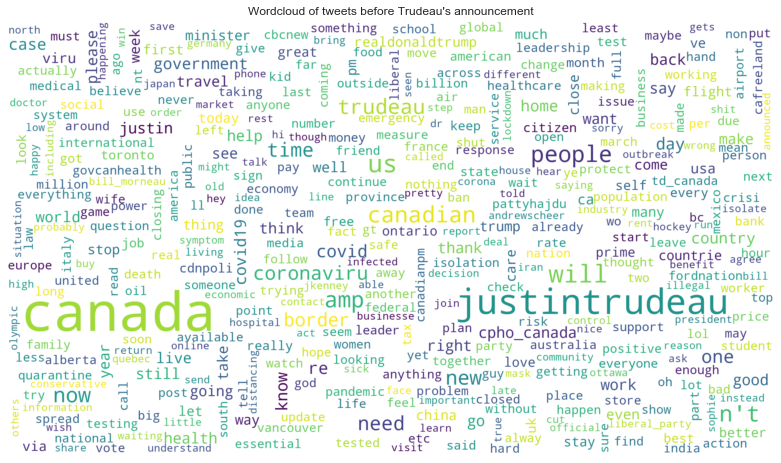

In [196]:
plt.figure(figsize=(14,8))

# create coloring from image
# image_colors = ImageColorGenerator(mask)
# plt.imshow(wcloud_before.recolor(color_func=image_colors), interpolation="bilinear")
plt.imshow(wcloud_before, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of tweets before Trudeau's announcement")

# # store to file
# plt.savefig("../img/canada_word_cloud.jpg", format="jpg")

Text(0.5, 1.0, "Wordcloud of tweets after Trudeau's announcement")

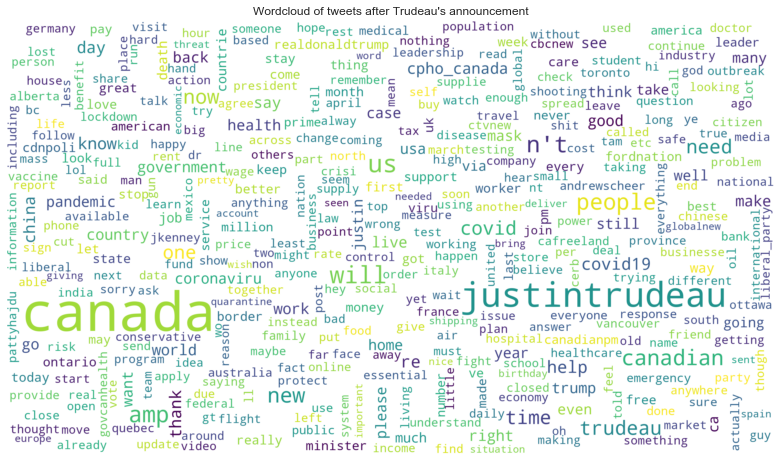

In [197]:
plt.figure(figsize=(14,8))
plt.imshow(wcloud_after, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of tweets after Trudeau's announcement")

> When comparing the wordcloud of tweets published before Trudeau's announcement on March 27th 2020, with the wordcloud of tweets published after the announcement, it looks that the words more used are the same in both graphs.

### Repetition of tweets before and after Trudeau's announcement

In [198]:
df_w_before = pd.DataFrame.from_dict(wcloud_before.words_, orient='index') \
               .reset_index().rename(columns={'index':'word', 0:'w_before'})
df_w_after = pd.DataFrame.from_dict(wcloud_after.words_, orient='index') \
               .reset_index().rename(columns={'index':'word', 0:'w_after'})

In [199]:
df_w = pd.merge(df_w_before, df_w_after, on="word")
df_w.head()

,word,w_before,w_after
0,canada,1.000000,1.000000
1,justintrudeau,0.295393,0.267799
2,us,0.124762,0.119918
3,will,0.121176,0.110068
4,people,0.102313,0.096318


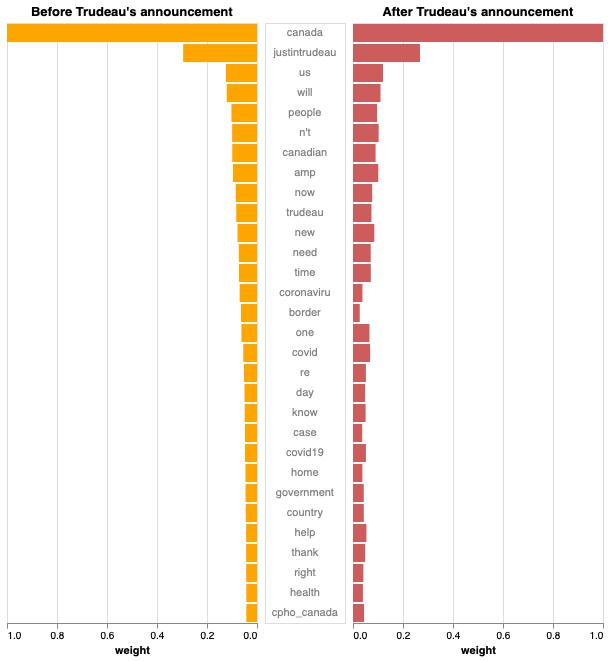

In [200]:
#plot
base = alt.Chart(df_w[:30]).properties(width=250)
my_order = df_w.word.to_list()

left = base.encode(
    y=alt.Y('word', axis=None, sort=my_order),
    x=alt.X('w_before', title='weight',
    scale=alt.Scale(reverse=True)),
    tooltip=['word', 'w_before']
).mark_bar(color='orange').properties(title="Before Trudeau's announcement")

middle = base.encode(
    y=alt.Y('word', axis=None, sort=my_order),
    text=alt.Text('word'),
).mark_text(color='grey').properties(width=80)

right = base.encode(
    y=alt.Y('word:O', axis=None, sort=my_order),
    x=alt.X('w_after', title='weight'),
    tooltip=['word', 'w_after']
).mark_bar(color='indianred').properties(title="After Trudeau's announcement")

alt.concat(left, middle, right, spacing=5)

> In general, it looks that each word have similar weights in the tweets published before and after Trudeau's announcement. Among the 30 most-repeated words, `coronavirus` and `border` have higher weights before the annoucement; in contrast it looks that `covid` and `help` have higher weights after the annoucement.

### Sentiment anlysis by tweets
Exploring sentiment analysisi with [SpaCy](https://spacy.io):  
- `polarity` score is a float within the range [-1.0, 1.0]
- `subjectivity` is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective

In [201]:
# change values of announcement
df.announcement = ["before" if i==False else "after" for i in df.announcement]

In [202]:
# polarity
df['bin_polarity'] = pd.cut(df.polarity, bins=50)
df_bin_polarity = pd.DataFrame(df.groupby(['bin_polarity', 'announcement'])['tweet'].count()).reset_index()
df_bin_polarity.bin_polarity = [np.mean([i.left, i.right]) for i in df_bin_polarity.bin_polarity]

# subjectivity
df['bin_subjectivity'] = pd.cut(df.subjectivity, bins=50)
df_bin_subjectivity = pd.DataFrame(df.groupby(['bin_subjectivity', 'announcement'])['tweet'].count()).reset_index()
df_bin_subjectivity.bin_subjectivity = [np.mean([i.left, i.right]) for i in df_bin_subjectivity.bin_subjectivity]

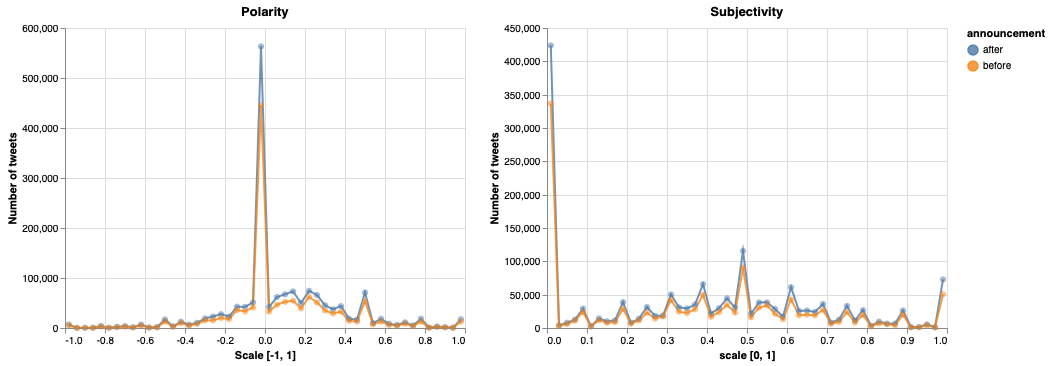

In [203]:
polar = alt.Chart(df_bin_polarity).encode(
    alt.X("bin_polarity", title="Scale [-1, 1]" ,scale=alt.Scale(domain=(-1, 1))),
    alt.Y("tweet",  title="Number of tweets"),
    alt.Color('announcement')
).properties(title="Polarity")

polar_line=polar.mark_line(clip=True, opacity=0.8)
polar_point=polar.mark_circle(opacity=0.5, size=40)

subject = alt.Chart(df_bin_subjectivity).mark_line(clip=True, opacity=0.8).encode(
    alt.X("bin_subjectivity", title="scale [0, 1]", scale=alt.Scale(domain=(0, 1))),
    alt.Y("tweet", title="Number of tweets"),
    alt.Color('announcement')
).properties(title="Subjectivity")

subject_line=subject.mark_line(clip=True, opacity=0.8)
subject_point=subject.mark_circle(opacity=0.5, size=40)

(polar_line+polar_point) | (subject_line+subject_point)

> In the previous plots we observe that the information from tweets before and after the announcement have very similar Polarity and Subjectivity curves.  
>
> In the Polarity plot, the largest number of tweets are neutral around zero. Beyond this, when comparing negative with positives tweets, overall we can see more positive than negative tweets, for the tweets before and after the announcement. In general, it looks like there were more tweets after the announcement.
>
> In the other hand, at the Subjectivity plot, the higer number of tweets were zero meaning they were very objective, followed by a score of 0.5 which is the half way between objective and subjective, and one as completly subjective. Similar to the Polarity plot, there were more tweets after the announcement than before it.


In [22]:
text = df_tot.tweet[0]

---
### Add references:
- SpaCy: https://spacy.io
- spaCyTextBlob: https://github.com/SamEdwardes/spaCyTextBlob